### ASSIGNMENT 6 - LSTM, GRU ANALYSIS

### LSTM & GRU ANALYSIS - Twitter Sentiment Analysis

### Assignment Submitted by VINAY M on 20-09-2023

- Apply sentiment analysis on sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api to detect sentiment. Add the overall summary of your analysis at the end.

- Dataset Link : https://drive.google.com/drive/folders/1AYl-PrRxentiOHU05zdjhAWbyCrR8YBl?usp=sharing


In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/DS_Datasets/tweets/training.1600000.processed.noemoticon.csv', encoding='latin1', header=None)

In [4]:
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
# Feature Information

In [6]:
col = {
    0 : 'polarity',
    1 : 'ID',
    2 : 'DateTime',
    3 : 'Query',
    4 : 'TwitterID',
    5 : 'Tweet',
}

In [7]:
col

{0: 'polarity', 1: 'ID', 2: 'DateTime', 3: 'Query', 4: 'TwitterID', 5: 'Tweet'}

In [8]:
data.rename(columns=col, inplace=True)

In [9]:
data

,polarity,ID,DateTime,Query,TwitterID,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
# Checking Null
data.isnull().sum()

polarity     0
ID           0
DateTime     0
Query        0
TwitterID    0
Tweet        0
dtype: int64

In [11]:
# Checking Positive and Negative review counts
data['polarity'].value_counts()

0    800000
4    800000
Name: polarity, dtype: int64

In [12]:
# There is no 2:neutral in the data
# recode value 4 to 1 for binary mapping

In [13]:
data['polarity'] = [1 if x == 4 else x for x in data['polarity']]

In [14]:
# Checking Positive and Negative review counts
data['polarity'].value_counts()

0    800000
1    800000
Name: polarity, dtype: int64

In [15]:
data

,polarity,ID,DateTime,Query,TwitterID,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [16]:
# Dropping unwanted columns

In [17]:
columns_to_drop = ['ID', 'DateTime', 'Query', 'TwitterID']
df = data.drop(columns=columns_to_drop, inplace=True)

In [18]:
df

In [19]:
# Due to Lack of Hardware # Picking only 30% of tweets without the bias
samplesize = int(round(data.shape[0]*0.3,0))
df = data.sample(samplesize)
df

,polarity,Tweet
978017,1,i love JONAS tv. its literally the best show e...
213226,0,I really want to just wear hoop shorts and a t...
393559,0,"@KhloeKardashian, I love you! you are soooo fu..."
809468,1,"@cybercool10 actually the test failed, but we ..."
420802,0,"@iLoveNickJ4LIFE Talking to my cousin, wo won'..."
...,...,...
1280578,1,"@frak Well its not always so cool, but ja at l..."
890433,1,"@ThePerfectSwag if you get one, I need it too!..."
615103,0,"@broken_baja thanks - it was a nice cake, it h..."
264747,0,Watching Mtv movie awards.. i missed the trans...


In [20]:
# Text preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'mightn', 'him', 'above', 'no', 'her', 'ma', 'once', "isn't", 'all', 'few', "shouldn't", 'those', 'a', 'ourselves', 'had', 'again', 'very', 'having', "needn't", "don't", 'the', 'each', 'an', 'you', 'below', 'was', 'didn', 'be', 'after', 'that', "it's", "that'll", 'between', 'through', 'on', 'should', "didn't", 'other', "shan't", 'will', 'out', 'before', 'needn', 's', 'has', 'll', 'don', 'wouldn', 'he', 'further', "couldn't", 'wasn', 'for', 've', 'about', 'can', 'under', 'until', "mightn't", 'if', 'shouldn', 'which', 'theirs', 'these', 'who', 'at', 'during', 'than', 'doesn', 'when', 'too', 'd', 'then', 'not', 'same', 'hasn', 'ours', 'up', "wouldn't", 'why', 'them', 'themselves', 're', 'does', 'into', 'in', "you've", 'most', 'weren', 'how', 'we', 'now', "won't", 't', 'over', 'some', 'yourself', 'there', 'did', 'm', 'his', 'to', 'its', 'from', 'our', 'being', 'any', 'only', 'been', 'off', "aren't", "hasn't", 'were', 'herself', 'they', 'down', 'aren', "mustn't", 'your', 'me', 'more', 'hav

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# WordNet is a lexical database for the English language that provides semantic relationships between words.
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [24]:
# Pipeline of Text preprocessing
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# function for lowercasing
def lowercase_text(review):
    return review.lower()

# function for removing URLs
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
def remove_urls(review):
    return re.sub(urlPattern, '', review)

# function for removing usernames
userPattern = '@[^\s]+'
def remove_usernames(review):
    return re.sub(userPattern, '', review)

# function for removing numbers/ years
numberPattern = r'\d'
def remove_numbers(review):
    return re.sub(numberPattern, '', review)

# function for removing punctuation
def remove_punctuation(review):
    return review.translate(str.maketrans('', '', string.punctuation))

# function for tokenization
def tokenize_text(review):
    return word_tokenize(review)

# function for removing stopwords
def remove_stopwords(tokens):
    return [w for w in tokens if w not in stopword]

# Instanciate WordNet Lemmatizer
wordLemm = WordNetLemmatizer()

# function for lemmatization
def lemmatize_words(tokens):
    return [wordLemm.lemmatize(w) for w in tokens if len(w) > 1]

# function to remove repeated words
def remove_same_words(text):
    words = text.split()
    unique_words = set()
    filtered_words = []
    for word in words:
        if word not in unique_words:
            unique_words.add(word)
            filtered_words.append(word)
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Define a function for joining processed text
def join_processed_text(tokens):
    return ' '.join(tokens)

In [25]:
original_review = "Hello #drvinaymanohar @vinay, How are you, i have created a short film(2023) short which is available at http://www.imdb.com and kindly review it!!!"
processed_review = lowercase_text(original_review)
processed_review = remove_urls(processed_review)
processed_review = remove_usernames(processed_review)
processed_review = remove_numbers(processed_review)
processed_review = remove_punctuation(processed_review)
processed_review = remove_same_words(processed_review)
tokens = tokenize_text(processed_review)
tokens = remove_stopwords(tokens)
lemmatized_tokens = lemmatize_words(tokens)
final_processed_review = join_processed_text(lemmatized_tokens)
print(f'Original:: {original_review}')
print()
print(f'Processed:: {final_processed_review}')

Original:: Hello #drvinaymanohar @vinay, How are you, i have created a short film(2023) short which is available at http://www.imdb.com and kindly review it!!!

Processed:: hello drvinaymanohar created short film available kindly review


In [26]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", '', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'\d', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = remove_same_words(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    lemmatized_tokens = [wordLemm.lemmatize(w) for w in tokens if len(w) > 1]
    return ' '.join(lemmatized_tokens)
df['Tweet_processed'] = df['Tweet'].apply(lambda x: preprocess_text(x))

In [27]:
df

,polarity,Tweet,Tweet_processed
978017,1,i love JONAS tv. its literally the best show e...,love jonas tv literally best show ever episode
213226,0,I really want to just wear hoop shorts and a t...,really want wear hoop short tshirt rest day re...
393559,0,"@KhloeKardashian, I love you! you are soooo fu...",love soooo funny lt want make brazilian fan si...
809468,1,"@cybercool10 actually the test failed, but we ...",actually test failed could party bring drink
420802,0,"@iLoveNickJ4LIFE Talking to my cousin, wo won'...",talking cousin wo wont stop asking play game m...
...,...,...,...
1280578,1,"@frak Well its not always so cool, but ja at l...",well always cool ja least im one personality k...
890433,1,"@ThePerfectSwag if you get one, I need it too!...",get one need idea im
615103,0,"@broken_baja thanks - it was a nice cake, it h...",thanks nice cake cream ate much
264747,0,Watching Mtv movie awards.. i missed the trans...,watching mtv movie award missed transformer clip


In [28]:
# saving processed text
df.to_csv('/content/drive/MyDrive/DS_Datasets/tweets/selected_tweets_processed.csv')

In [29]:
# identification of common words in processed tweets
from collections import Counter
word_counter = Counter()

# Iterate through each line (text) in the 'text' column
for line in df['Tweet_processed']:
    # Split the line into words, convert to lowercase, and filter out short words
    words = [word.lower() for word in line.split() if len(word) > 2]
    # Update the word_counter with the words from the current line
    word_counter.update(words)

# Get the 30 most common words and their frequencies
common_words = word_counter.most_common(30)

# Print the most common words and their frequencies
common_words

[('day', 29457),
 ('good', 25766),
 ('get', 25005),
 ('like', 22945),
 ('got', 20338),
 ('dont', 19476),
 ('today', 19346),
 ('work', 19169),
 ('love', 19036),
 ('going', 18740),
 ('cant', 18461),
 ('time', 18432),
 ('back', 16320),
 ('one', 16034),
 ('lol', 15792),
 ('know', 15411),
 ('want', 14147),
 ('really', 14127),
 ('see', 13403),
 ('well', 13193),
 ('think', 12834),
 ('still', 12653),
 ('night', 12406),
 ('new', 12024),
 ('need', 11751),
 ('thanks', 11677),
 ('home', 11432),
 ('amp', 11197),
 ('miss', 11141),
 ('much', 10718)]

In [30]:
# identification of common words in negative tweets
from collections import Counter
word_counter = Counter()
for index, row in df.iterrows():
    if row['polarity'] == 0:
        words = [word.lower() for word in row['Tweet_processed'].split() if len(word) > 2]
        word_counter.update(words)
common_words_neg_tweets = word_counter.most_common(30)
common_words_neg_tweets

[('day', 14250),
 ('get', 13890),
 ('work', 13118),
 ('dont', 13037),
 ('cant', 12797),
 ('like', 11940),
 ('got', 10975),
 ('today', 10792),
 ('want', 9948),
 ('going', 9730),
 ('miss', 9458),
 ('back', 9454),
 ('time', 8832),
 ('really', 8748),
 ('still', 8493),
 ('good', 8388),
 ('one', 8083),
 ('sad', 7909),
 ('know', 7729),
 ('feel', 7348),
 ('need', 7307),
 ('home', 6959),
 ('think', 6839),
 ('wish', 6827),
 ('last', 6474),
 ('lol', 6209),
 ('bad', 6195),
 ('sorry', 6066),
 ('well', 5926),
 ('see', 5922)]

In [31]:
# identification of common words in positive tweets
from collections import Counter
word_counter = Counter()
for index, row in df.iterrows():
    if row['polarity'] == 1:
        words = [word.lower() for word in row['Tweet_processed'].split() if len(word) > 2]
        word_counter.update(words)
common_words_pos_tweets = word_counter.most_common(30)
common_words_pos_tweets

[('good', 17378),
 ('day', 15207),
 ('love', 14096),
 ('get', 11115),
 ('like', 11005),
 ('thanks', 10026),
 ('time', 9600),
 ('lol', 9583),
 ('got', 9363),
 ('going', 9010),
 ('today', 8554),
 ('one', 7951),
 ('new', 7692),
 ('know', 7682),
 ('see', 7481),
 ('well', 7267),
 ('great', 7058),
 ('back', 6866),
 ('night', 6501),
 ('dont', 6439),
 ('haha', 6066),
 ('work', 6051),
 ('amp', 6022),
 ('think', 5995),
 ('morning', 5941),
 ('happy', 5796),
 ('twitter', 5693),
 ('hope', 5668),
 ('cant', 5664),
 ('really', 5379)]

In [32]:
df

,polarity,Tweet,Tweet_processed
978017,1,i love JONAS tv. its literally the best show e...,love jonas tv literally best show ever episode
213226,0,I really want to just wear hoop shorts and a t...,really want wear hoop short tshirt rest day re...
393559,0,"@KhloeKardashian, I love you! you are soooo fu...",love soooo funny lt want make brazilian fan si...
809468,1,"@cybercool10 actually the test failed, but we ...",actually test failed could party bring drink
420802,0,"@iLoveNickJ4LIFE Talking to my cousin, wo won'...",talking cousin wo wont stop asking play game m...
...,...,...,...
1280578,1,"@frak Well its not always so cool, but ja at l...",well always cool ja least im one personality k...
890433,1,"@ThePerfectSwag if you get one, I need it too!...",get one need idea im
615103,0,"@broken_baja thanks - it was a nice cake, it h...",thanks nice cake cream ate much
264747,0,Watching Mtv movie awards.. i missed the trans...,watching mtv movie award missed transformer clip


In [33]:
# Word Clouds on Negative Tweets
import wordcloud
from wordcloud import WordCloud

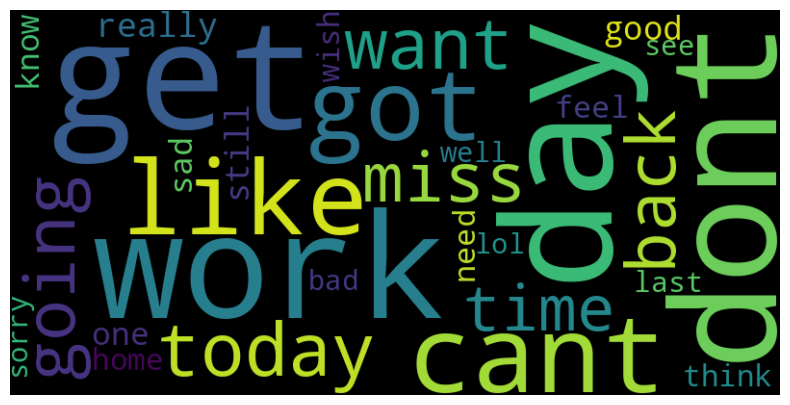

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words_neg_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

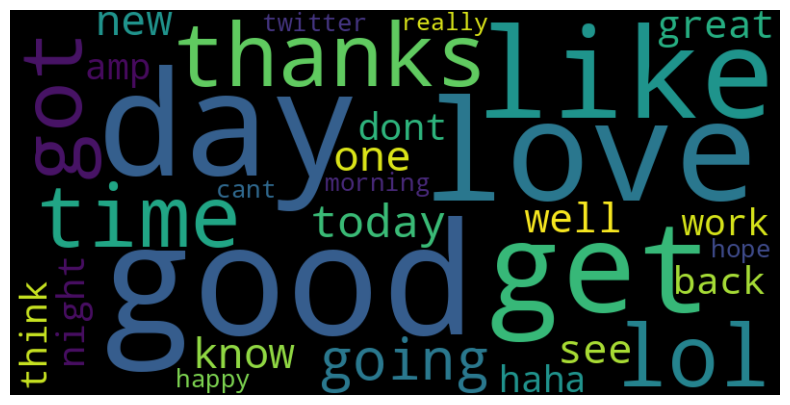

In [35]:
# Word Clouds on Positive Reviews
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words_pos_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

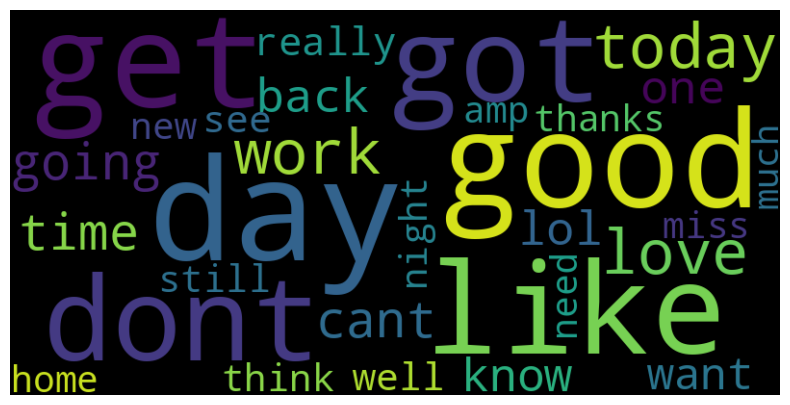

In [36]:
# Overall
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Splitting X(Review) and Y (Sentiment) for Sentiment Analysis
X = df['Tweet_processed'].values
y = df['polarity'].values

In [38]:
X.shape

(480000,)

In [39]:
y.shape

(480000,)

In [40]:
# finding compatibility of X and Y Rows
if X.shape[0] == y.shape[0]:
    print("Data is compatible for Analyis")
else:
    print("Data is not compatible for Analyis")

Data is compatible for Analyis


In [41]:
# Tokenisation RNN
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 1000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[  0   0   0 ...  87 139 555]
 [  0   0   0 ...   8  35   5]
 [  0   0   0 ... 419 198 311]
 ...
 [  0   0   0 ... 574 548  34]
 [  0   0   0 ...  98 486 161]
 [  0   0   0 ...   6  62 321]]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, y, test_size=0.3, random_state=42)

In [43]:
X_train.shape

(336000, 200)

In [44]:
y_train.shape

(336000,)

In [45]:
X_test.shape

(144000, 200)

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Define the parameters
max_words = 1000  # Maximum number of words in your vocabulary
embedding_dim = 100  # Dimension of word embeddings
sequence_length = 200  # Maximum sequence length

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=sequence_length))

# LSTM layer
model.add(LSTM(64, return_sequences=True))

# GRU layer
model.add(GRU(32))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          100000    
                                                                 
 lstm (LSTM)                 (None, 200, 64)           42240     
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 151681 (592.50 KB)
Trainable params: 151681 (592.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
10500/10500 [==============================] - 208s 19ms/step - loss: 0.5170 - accuracy: 0.7435 - val_loss: 0.5009 - val_accuracy: 0.7510
Epoch 2/5
10500/10500 [==============================] - 178s 17ms/step - loss: 0.4992 - accuracy: 0.7545 - val_loss: 0.4975 - val_accuracy: 0.7539
Epoch 3/5
10500/10500 [==============================] - 202s 19ms/step - loss: 0.4919 - accuracy: 0.7603 - val_loss: 0.4960 - val_accuracy: 0.7544
Epoch 4/5
10500/10500 [==============================] - 192s 18ms/step - loss: 0.4869 - accuracy: 0.7631 - val_loss: 0.4935 - val_accuracy: 0.7568
Epoch 5/5
10500/10500 [==============================] - 203s 19ms/step - loss: 0.4792 - accuracy: 0.7677 - val_loss: 0.4939 - val_accuracy: 0.7565


In [49]:
# Overall accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}\n Test accuracy: {accuracy:.4f}')

4500/4500 [==============================] - 30s 7ms/step - loss: 0.4939 - accuracy: 0.7565
Test loss: 0.4939
 Test accuracy: 0.7565


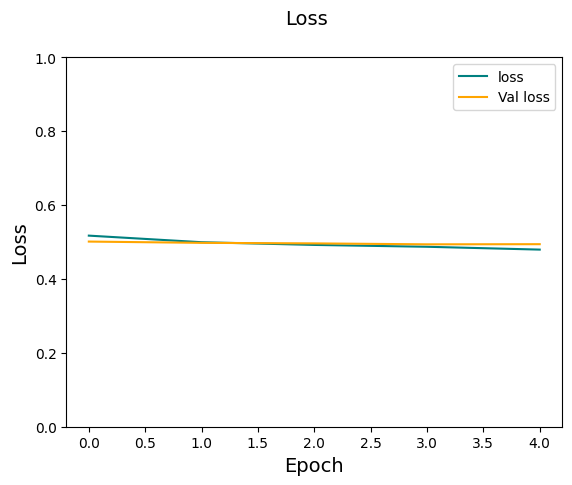

In [50]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

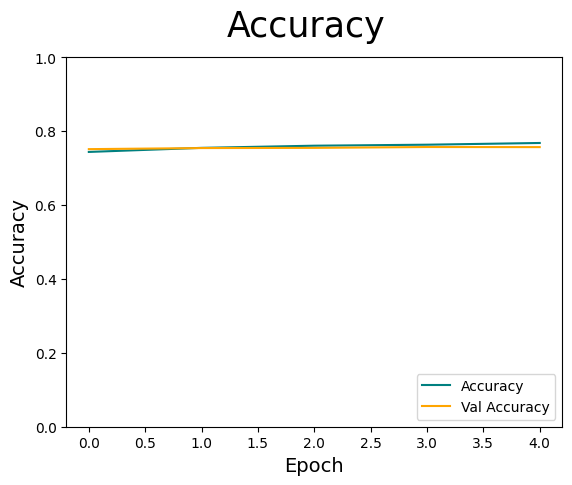

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [52]:
inputText = "I hate this country"
processedText = preprocess_text(inputText)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Tweet')
else:
    print('Negative Tweet')

1/1 [==============================] - 1s 608ms/step
[[0.07240439]]
Negative Negative


In [53]:
inputText = "I am in love with you sweet heart"
processedText = preprocess_text(inputText)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Tweet')
else:
    print('Negative Tweet')

1/1 [==============================] - 0s 34ms/step
[[0.9520863]]
Positive Review


In [54]:
# Saving Model
from keras.models import load_model
model.save('/content/drive/MyDrive/DS_Datasets/tweets/Twitter_LSTM_GRU.h5')

In [55]:
# Using models to make predictions
trainedModel = load_model('/content/drive/MyDrive/DS_Datasets/tweets/Twitter_LSTM_GRU.h5')
feed = input("Tweet: ")
#calling function to clean data
processedText = preprocess_text(feed)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=max_len)
pred = trainedModel.predict(test)
if pred > 0.5:
    print('Positive Tweet')
else:
    print('Negative Tweet')

Tweet: I will make you to cry
1/1 [==============================] - 1s 619ms/step
Negative Review


In [56]:
# Using models to make predictions
trainedModel = load_model('/content/drive/MyDrive/DS_Datasets/tweets/Twitter_LSTM_GRU.h5')
feed = input("Tweet: ")
#calling function to clean data
processedText = preprocess_text(feed)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=max_len)
pred = trainedModel.predict(test)
if pred > 0.5:
    print('Positive Tweet')
else:
    print('Negative Tweet')

Tweet: Come on lets have a party
1/1 [==============================] - 1s 566ms/step
Positive Review
